# **Startup**

Install the dgl library. Website Link: https://docs.dgl.ai/tutorials/blitz/index.html (Hint: you need to run the command below every time you open this file, and then restart the runtime.)

In [ ]:
!pip install dgl-cu111 dglgo -f https://data.dgl.ai/wheels/repo.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.dgl.ai/wheels/repo.html
     |████████████████████████████████| 252.8 MB 16 kB/s 
     |████████████████████████████████| 77 kB 3.0 MB/s 
     |████████████████████████████████| 51 kB 449 kB/s 
     |████████████████████████████████| 103 kB 29.0 MB/s 
     |████████████████████████████████| 596 kB 47.5 MB/s 
     |████████████████████████████████| 109 kB 42.2 MB/s 
     |████████████████████████████████| 11.1 MB 45.3 MB/s 
     |████████████████████████████████| 45 kB 3.2 MB/s 
     |████████████████████████████████| 42 kB 923 kB/s 
     |████████████████████████████████| 3.1 MB 37.3 MB/s 
     |████████████████████████████████| 546 kB 44.5 MB/s 
     |████████████████████████████████| 84 kB 3.7 MB/s 
     |████████████████████████████████| 100 kB 11.4 MB/s 
     |████████████████████████████████| 121 kB 37.8 MB/s 
     |████████████████████████████████| 90 

Save the code and dataset in your own directory. Everything is in the DGSR-master folder. The command below will change depend on your setting.

In [ ]:
%cd drive/MyDrive/TCSS556/DGSR-master

/content/drive/MyDrive/TCSS556/DGSR-master


# Data Generation

Import dgl library, check the library sucessfully installed or not.

In [ ]:
import dgl

DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


There are three datasets can used for training and testing, which are beauty, games, and cds. You need to run the file ```new_data.py``` to generate the data format needed for our model. All the new data will be stored in the ```Newdata``` folder. For each dataset, we have training, testing, and validating data. Due to the hardware limitation, I only sucessfully generated the data from Games dataset with 25GB RAM. If you have enough computation power, feel free try other datasets and make sure you set 'data' argument correctly.  

In [ ]:
%run new_data.py --data=Games --job=10 --item_max_length=50 --user_max_length=50 --k_hop=2

DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)
start: 2022-04-25 20:30:26.545879
The number of train set: 194210
The number of test set: 30901
end: 2022-04-25 21:13:26.576483


You need to run the file ```generate_neg.py``` to generate data to speed up the test. (Hint: Make sure you modified the value of dataset in the code to name of dataset you want run. Games for Games, Beauty for Beauty, cd for cd.) After you finished the execution for all the dataset, you should obtain three file named ```Games_neg```, ```Beauty_neg```, and ```cd_neg```.

In [ ]:
%run generate_neg.py

# Experiment

The following code showes the performance of the model with different variants by using the Game dataset. This experiment tests all the avaliable approaches for calculating long-term and short-term information. For long-term information, we have three methods which are Graph Convolution Neural Network (GCN), Recurrent Neural Network (GRU), and Dynamic Graph Attention Mechanism (ORGAT). For short-term information, we use Last Interaction Embedding (Last) or Attention Mechanism (ATT). Beside this, evaluation metrics DNCG@10 and Hit@10 are used for the performance comparision. (Hint: If you are able to generate the data from the other datasets, you only need to change the "data" argument to the dataset you are looking for.)

1. Combination 1: Long-term: GRU, Short-term: No Setting.

In [ ]:
%run new_main.py --data=Games \
 --gpu=0 \
 --epoch=20 \
 --hidden_size=50 \
 --batchSize=50 \
 --user_long=gru\
 --user_short=none \
 --item_long=gru \
 --item_short=none \
 --user_update=rnn \
 --item_update=rnn \
 --lr=0.001 \
 --l2=0.0001 \
 --layer_num=2 \
 --item_max_length=50 \
 --user_max_length=50 \
 --attn_drop=0.3 \
 --feat_drop=0.3 \
 --record \

Namespace(attn_drop=0.3, batchSize=50, data='Games', epoch=20, feat_drop=0.3, gpu='0', hidden_size=50, item_long='gru', item_max_length=50, item_short='none', item_update='rnn', k_hop=2, l2=0.0001, last_item=False, layer_num=2, lr=0.001, model_record=False, record=True, user_long='gru', user_max_length=50, user_short='none', user_update='rnn', val=False)
Logging to results/Games_ba_50_G_0_dim_50_ulong_gru_ilong_gru_US_none_IS_none_La_False_UM_50_IM_50_K_2_layer_2_l2_0.0001
train number: 62794
test number: 5827
user number: 31013
item number: 23715
start training:  2022-05-28 07:33:51.020305
Iter 400, loss 9.3833 2022-05-28 07:45:33.410917
Iter 800, loss 9.2552 2022-05-28 07:56:33.291230
Iter 1200, loss 9.1575 2022-05-28 08:07:55.309299
Epoch 0, loss 9.1457 =============================================
start predicting:  2022-05-28 08:09:17.828261
train_loss:9.1457	test_loss:9.2882	Recall@5:0.3623	Recall@10:0.4896	Recall@20:0.6281	NDGG@5:0.2576	NDGG10@10:0.2986	NDGG@20:0.3334	Epoch:0,0,

2. Combination 2: Long-term: ORGAT, Short-term: No Setting.

In [ ]:
%run new_main.py --data=Games \
 --gpu=0 \
 --epoch=20 \
 --hidden_size=50 \
 --batchSize=50 \
 --user_long=orgat\
 --user_short=none \
 --item_long=orgat \
 --item_short=none \
 --user_update=rnn \
 --item_update=rnn \
 --lr=0.001 \
 --l2=0.0001 \
 --layer_num=2 \
 --item_max_length=50 \
 --user_max_length=50 \
 --attn_drop=0.3 \
 --feat_drop=0.3 \
 --record \

Namespace(attn_drop=0.3, batchSize=50, data='Games', epoch=20, feat_drop=0.3, gpu='0', hidden_size=50, item_long='orgat', item_max_length=50, item_short='none', item_update='rnn', k_hop=2, l2=0.0001, last_item=False, layer_num=2, lr=0.001, model_record=False, record=True, user_long='orgat', user_max_length=50, user_short='none', user_update='rnn', val=False)
Logging to results/Games_ba_50_G_0_dim_50_ulong_orgat_ilong_orgat_US_none_IS_none_La_False_UM_50_IM_50_K_2_layer_2_l2_0.0001
train number: 62794
test number: 5827
user number: 31013
item number: 23715
start training:  2022-05-28 00:37:21.037091
Iter 400, loss 9.3943 2022-05-28 00:49:39.318340
Iter 800, loss 9.2730 2022-05-28 01:01:15.072067
Iter 1200, loss 9.1845 2022-05-28 01:12:50.505575
Epoch 0, loss 9.1734 =============================================
start predicting:  2022-05-28 01:14:11.956218
train_loss:9.1734	test_loss:9.2756	Recall@5:0.3693	Recall@10:0.4915	Recall@20:0.6363	NDGG@5:0.2605	NDGG10@10:0.3000	NDGG@20:0.3365	Ep

3. Combination 3: Long-term: No Setting, Short-term: ATT.

In [ ]:
%run new_main.py --data=Games \
 --gpu=0 \
 --epoch=20 \
 --hidden_size=50 \
 --batchSize=50 \
 --user_long=none\
 --user_short=att \
 --item_long=none \
 --item_short=att \
 --user_update=rnn \
 --item_update=rnn \
 --lr=0.001 \
 --l2=0.0001 \
 --layer_num=2 \
 --item_max_length=50 \
 --user_max_length=50 \
 --attn_drop=0.3 \
 --feat_drop=0.3 \
 --record \

Namespace(attn_drop=0.3, batchSize=50, data='Games', epoch=20, feat_drop=0.3, gpu='0', hidden_size=50, item_long='none', item_max_length=50, item_short='att', item_update='rnn', k_hop=2, l2=0.0001, last_item=False, layer_num=2, lr=0.001, model_record=False, record=True, user_long='none', user_max_length=50, user_short='att', user_update='rnn', val=False)
Logging to results/Games_ba_50_G_0_dim_50_ulong_none_ilong_none_US_att_IS_att_La_False_UM_50_IM_50_K_2_layer_2_l2_0.0001
train number: 62794
test number: 5827
user number: 31013
item number: 23715
start training:  2022-05-27 05:44:32.569564
Iter 400, loss 9.4680 2022-05-27 06:16:40.803463
Iter 800, loss 9.2990 2022-05-27 06:47:12.783545
Iter 1200, loss 9.2100 2022-05-27 07:17:48.306243
Epoch 0, loss 9.1976 =============================================
start predicting:  2022-05-27 07:21:34.213443
train_loss:9.1976	test_loss:9.3340	Recall@5:0.3585	Recall@10:0.4755	Recall@20:0.6185	NDGG@5:0.2517	NDGG10@10:0.2896	NDGG@20:0.3256	Epoch:0,0,

4. Combination 4: Long-term: GCN, Short-term: ATT.

In [ ]:
%run new_main.py --data=Games \
 --gpu=0 \
 --epoch=20 \
 --hidden_size=50 \
 --batchSize=50 \
 --user_long=gcn\
 --user_short=att \
 --item_long=gcn \
 --item_short=att \
 --user_update=rnn \
 --item_update=rnn \
 --lr=0.001 \
 --l2=0.0001 \
 --layer_num=2 \
 --item_max_length=50 \
 --user_max_length=50 \
 --attn_drop=0.3 \
 --feat_drop=0.3 \
 --record \

Namespace(attn_drop=0.3, batchSize=50, data='Games', epoch=20, feat_drop=0.3, gpu='0', hidden_size=50, item_long='gcn', item_max_length=50, item_short='att', item_update='rnn', k_hop=2, l2=0.0001, last_item=False, layer_num=2, lr=0.001, model_record=False, record=True, user_long='gcn', user_max_length=50, user_short='att', user_update='rnn', val=False)
Logging to results/Games_ba_50_G_0_dim_50_ulong_gcn_ilong_gcn_US_att_IS_att_La_False_UM_50_IM_50_K_2_layer_2_l2_0.0001
train number: 62794
test number: 5827
user number: 31013
item number: 23715
start training:  2022-05-26 07:12:31.990598
Iter 400, loss 9.3773 2022-05-26 07:19:47.139104
Iter 800, loss 9.2493 2022-05-26 07:27:28.130770
Iter 1200, loss 9.1712 2022-05-26 07:33:57.979181
Epoch 0, loss 9.1634 =============================================
start predicting:  2022-05-26 07:34:47.108187
train_loss:9.1634	test_loss:9.3283	Recall@5:0.3473	Recall@10:0.4759	Recall@20:0.6242	NDGG@5:0.2448	NDGG10@10:0.2862	NDGG@20:0.3236	Epoch:0,0,0,0,

5. Combination 5: Long-term: GRU, Short-term: ATT.

In [ ]:
%run new_main.py --data=Games \
 --gpu=0 \
 --epoch=20 \
 --hidden_size=50 \
 --batchSize=50 \
 --user_long=gru\
 --user_short=att \
 --item_long=gru \
 --item_short=att \
 --user_update=rnn \
 --item_update=rnn \
 --lr=0.001 \
 --l2=0.0001 \
 --layer_num=2 \
 --item_max_length=50 \
 --user_max_length=50 \
 --attn_drop=0.3 \
 --feat_drop=0.3 \
 --record \

Namespace(attn_drop=0.3, batchSize=50, data='Games', epoch=20, feat_drop=0.3, gpu='0', hidden_size=50, item_long='gru', item_max_length=50, item_short='att', item_update='rnn', k_hop=2, l2=0.0001, last_item=False, layer_num=2, lr=0.001, model_record=False, record=True, user_long='gru', user_max_length=50, user_short='att', user_update='rnn', val=False)
Logging to results/Games_ba_50_G_0_dim_50_ulong_gru_ilong_gru_US_att_IS_att_La_False_UM_50_IM_50_K_2_layer_2_l2_0.0001
train number: 62794
test number: 5827
user number: 31013
item number: 23715
start training:  2022-05-25 22:15:51.954094
Iter 400, loss 9.3428 2022-05-25 22:25:26.631654
Iter 800, loss 9.2097 2022-05-25 22:34:58.626428
Iter 1200, loss 9.1184 2022-05-25 22:44:09.899875
Epoch 0, loss 9.1104 =============================================
start predicting:  2022-05-25 22:45:16.386551
train_loss:9.1104	test_loss:9.2283	Recall@5:0.3715	Recall@10:0.5045	Recall@20:0.6466	NDGG@5:0.2628	NDGG10@10:0.3056	NDGG@20:0.3415	Epoch:0,0,0,0,

6. Combination 6: Long-term: ORGAT, Short-term: ATT.

In [ ]:
%run new_main.py --data=Games \
 --gpu=0 \
 --epoch=20 \
 --hidden_size=50 \
 --batchSize=50 \
 --user_long=orgat\
 --user_short=att \
 --item_long=orgat \
 --item_short=att \
 --user_update=rnn \
 --item_update=rnn \
 --lr=0.001 \
 --l2=0.0001 \
 --layer_num=2 \
 --item_max_length=50 \
 --user_max_length=50 \
 --attn_drop=0.3 \
 --feat_drop=0.3 \
 --record \

Namespace(attn_drop=0.3, batchSize=50, data='Games', epoch=20, feat_drop=0.3, gpu='0', hidden_size=50, item_long='orgat', item_max_length=50, item_short='att', item_update='rnn', k_hop=2, l2=0.0001, last_item=False, layer_num=2, lr=0.001, model_record=False, record=True, user_long='orgat', user_max_length=50, user_short='att', user_update='rnn', val=False)
Logging to results/Games_ba_50_G_0_dim_50_ulong_orgat_ilong_orgat_US_att_IS_att_La_False_UM_50_IM_50_K_2_layer_2_l2_0.0001
train number: 62794
test number: 5827
user number: 31013
item number: 23715
start training:  2022-04-29 21:44:12.128499
Iter 400, loss 9.3987 2022-04-29 22:15:18.760638
Iter 800, loss 9.2812 2022-04-29 22:44:44.573710
Iter 1200, loss 9.1880 2022-04-29 23:13:10.005540
Epoch 0, loss 9.1812 =============================================
start predicting:  2022-04-29 23:16:21.262778
train_loss:9.1812	test_loss:9.2615	Recall@5:0.3594	Recall@10:0.4846	Recall@20:0.6281	NDGG@5:0.2554	NDGG10@10:0.2958	NDGG@20:0.3320	Epoch:

# Result

There are several errors in the authors' code. All the variants setting with using Last as short-term didn't work, and the code also miss the part of using GNC as long-term and no setting on short-term. Due to these problem, I sucessfully generate 6 combination of setting out of 11. The results are in the following table.(Hint: Recall rate is same as Hit rate)  

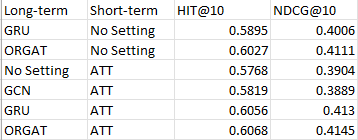

According to the result from HIT@10 and NDCG@10 metrics, the variants setting with ORGAT(which also named DAT in article) as long-term and ATT as short-term has the best performance. The result is same as the one in the paper.